In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NLTK: Para procesamiento de lenguaje natural.

tqdm: Para mostrar barras de progreso en bucles

In [9]:
!pip install nltk tqdm


os: Manipulación de rutas y directorios.

glob: Búsqueda de archivos por patrones.

nltk: Procesamiento de lenguaje natural.

random: Generación de números y selecciones aleatorias.

defaultdict: Diccionarios con valores predeterminados.

tqdm: Barras de progreso para bucles.

In [13]:
import os
import glob
import nltk
import random
from collections import defaultdict
from tqdm import tqdm

# Descargar el tokenizador de oraciones de NLTK
nltk.download('punkt_tab')

def contar_oraciones(texto):
    """Devuelve una lista de oraciones en un texto."""
    return nltk.sent_tokenize(texto)

def extraer_anotaciones(archivo_ann):
    """Extrae las anotaciones del archivo .ann y cuenta etiquetas por clase."""
    etiquetas = defaultdict(int)
    if os.path.exists(archivo_ann):
        with open(archivo_ann, 'r', encoding='utf-8') as f:
            for linea in f:
                partes = linea.strip().split('\t')
                if len(partes) > 2 and partes[0].startswith('T'):
                    etiqueta = partes[1].split()[0]
                    etiquetas[etiqueta] += 1
    return etiquetas

def procesar_corpus(ruta_base):
    """Procesa todas las subcarpetas dentro de la carpeta base para extraer estadísticas."""
    total_notas = 0
    total_oraciones = 0
    etiquetas_por_clase = defaultdict(int)
    notas_anotadas = 0
    notas_no_anotadas = 0
    todas_las_oraciones = []

    for root, _, _ in os.walk(ruta_base):
        archivos_txt = glob.glob(os.path.join(root, "*.txt"))
        total_notas += len(archivos_txt)

        for archivo_txt in tqdm(archivos_txt, desc=f"Procesando {root}"):
            # Leer el contenido del archivo .txt
            with open(archivo_txt, 'r', encoding='utf-8') as f:
                texto = f.read()
            oraciones = contar_oraciones(texto)
            total_oraciones += len(oraciones)
            todas_las_oraciones.extend(oraciones)

            # Leer el archivo .ann correspondiente
            archivo_ann = archivo_txt.replace('.txt', '.ann')
            etiquetas = extraer_anotaciones(archivo_ann)
            if etiquetas:
                notas_anotadas += 1
                for etiqueta, cantidad in etiquetas.items():
                    etiquetas_por_clase[etiqueta] += cantidad
            else:
                notas_no_anotadas += 1

    # Seleccionar una oración aleatoria
    oracion_aleatoria = random.choice(todas_las_oraciones) if todas_las_oraciones else "No hay oraciones disponibles."

    # Mostrar resultados
    print("Total de notas clínicas:", total_notas)
    print("Total de notas anotadas:", notas_anotadas)
    print("Total de notas no anotadas:", notas_no_anotadas)
    print("Total de oraciones:", total_oraciones)
    print("Oración aleatoria:", oracion_aleatoria)
    print("Etiquetas por clase:")
    for etiqueta, cantidad in etiquetas_por_clase.items():
        print(f"  {etiqueta}: {cantidad}")

    return {
        "total_notas": total_notas,
        "notas_anotadas": notas_anotadas,
        "notas_no_anotadas": notas_no_anotadas,
        "total_oraciones": total_oraciones,
        "oracion_aleatoria": oracion_aleatoria,
        "etiquetas_por_clase": dict(etiquetas_por_clase)
    }

# Ruta de la carpeta base que contiene el corpus
ruta_base = "/content/drive/MyDrive/UNIVALLE_IA/TRABAJO_I/CORPUS/in"
resultado = procesar_corpus(ruta_base)

#ruta_base2 = "/content/drive/MyDrive/Trabajo_de_Grado/corpus/Equipo2"
#resultado2 = procesar_corpus(ruta_base2)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
Procesando /content/drive/MyDrive/UNIVALLE_IA/TRABAJO_I/CORPUS/in: 100%|██████████| 250/250 [00:14<00:00, 17.25it/s] 

Total de notas clínicas: 250
Total de notas anotadas: 250
Total de notas no anotadas: 0
Total de oraciones: 3895
Oración aleatoria: Gleason 4+4 - cT4N1M0, muy alto riesgo PSAi: 675 ng/ml.
Etiquetas por clase:
  FECHA: 1481
  CANCER: 1123
  EDAD: 260
  BIOMARCADOR: 914
  TNM: 360
  GLEASON: 527
  MEDICAMENTO: 586
  DOSIS: 744
  TRATAMIENTO: 926
  CIRUGIA: 248


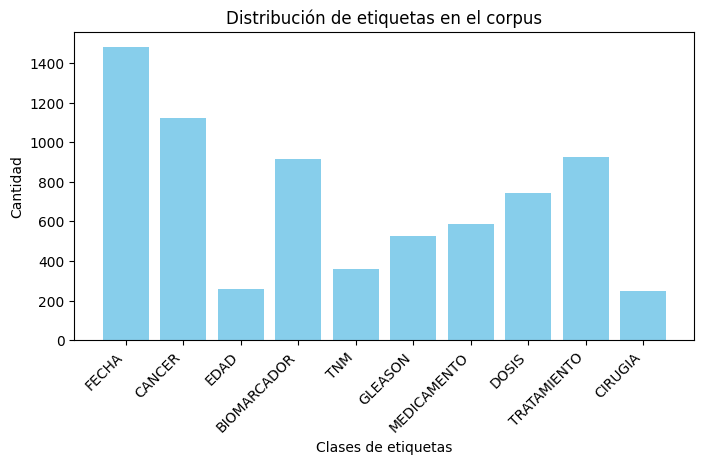

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict

def graficar_etiquetas(etiquetas_por_clase):
    """Genera un gráfico de barras con la distribución de etiquetas."""
    if etiquetas_por_clase:
        plt.figure(figsize=(8, 4))
        plt.bar(etiquetas_por_clase.keys(), etiquetas_por_clase.values(), color='skyblue')
        plt.xlabel("Clases de etiquetas")
        plt.ylabel("Cantidad")
        plt.title("Distribución de etiquetas en el corpus")
        plt.xticks(rotation=45, ha='right')
        plt.show()

graficar_etiquetas(resultado["etiquetas_por_clase"])
#graficar_etiquetas(resultado2["etiquetas_por_clase"])